<h1 style="text-align:center">SUPERMARKET SALES ANALYSIS</h1>

<div style="text-align: center;">
    <img src="sales.jpg" alt="Supermarket"/>>
</div>

<h2>Acknowledgement</h2>

This project is made possible by the efforts of those who have meticulously collected and maintained the dataset on [Kaggle](https://www.kaggle.com/datasets/aungpyaeap/supermarket-sales).

<h2>Objective</h2>

<p>The primary goal of this project is to analyze and predict sales patterns in a supermarket chain, leveraging a dataset that encompasses three months of sales data from three different branches. This analysis aims to uncover insights into customer behavior, sales trends, and branch performance, ultimately leading to strategic decisions to enhance profitability and customer satisfaction.</p>

<h2>Given the Dataset, several questions can be asked, for example:</h2>

- What are the sales patterns across different branches?
- Which product lines are most profitable?
- How does customer type affect purchasing behavior?
- What is the impact of gender on product preference?
- What are the peak shopping hours and days?

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the data and performing a perliminary analysis

In [2]:
sales_data = pd.read_csv(r"supermarket_sales - Sheet1.csv")
sales_data

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [3]:
sales_data.shape

(1000, 17)

In [4]:
sales_data.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [5]:
sales_data.describe()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000
mean,55.672130,5.510000,15.379369,322.966749,307.58738,4.761905,15.379369,6.97270
std,26.494628,2.923431,11.708825,245.885335,234.17651,0.000000,11.708825,1.71858
min,10.080000,1.000000,0.508500,10.678500,10.17000,4.761905,0.508500,4.00000
25%,32.875000,3.000000,5.924875,124.422375,118.49750,4.761905,5.924875,5.50000
50%,55.230000,5.000000,12.088000,253.848000,241.76000,4.761905,12.088000,7.00000
75%,77.935000,8.000000,22.445250,471.350250,448.90500,4.761905,22.445250,8.50000
max,99.960000,10.000000,49.650000,1042.650000,993.00000,4.761905,49.650000,10.00000


In [6]:
sales_data.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

# Brief Summary

<h2>Based on the preliminary checks conducted on the supermarket sales dataset, here's a brief summary:</h2>

<h5>Dataset Structure:</h5>

- The dataset comprises 1000 entries and 17 attributes. This structure indicates a moderately sized dataset, providing a comprehensive overview of sales data.

   
<h5>Preview of Data:</h5>

- The initial rows demonstrate a variety of attributes, including transaction details (Invoice ID, Date, Time), branch information (Branch, City), customer demographics (Customer type, Gender), and detailed sales information (Product line, Unit price, Quantity, Tax, Total, Payment method). Additionally, it includes cost details, profitability metrics (Gross margin percentage, Gross income), and customer satisfaction (Rating).

   
<h5>Statistical Overview:</h5>

- The numerical attributes like Unit price, Quantity, and Total show a range of values, indicating diverse purchasing patterns and product pricing. The average customer rating is around 6.97, suggesting a moderate level of customer satisfaction.

   
<h5> Completeness of Data: </h5>

- The dataset has no missing values in any of the columns, indicating a well-maintained and complete dataset, which is ideal for analysis without the need for imputation strategies.

# Exploratory Data Analysis

<h5>Distribution of Sales across Branches</h5>

In [7]:
branch_sales_distribution = sales_data.groupby('Branch')['Total'].sum()

<h5>Distribution of Sales across Product Lines</h5>

In [8]:
product_line_distribution = sales_data.groupby('Product line')['Total'].sum().sort_values(ascending=False)

<h5>Sales based on Gender</h5>

In [9]:
gender_sales_distribution = sales_data.groupby('Gender')['Total'].sum()

<h5>Sales based on Customer Type</h5>

In [10]:
customer_type_distribution = sales_data.groupby('Customer type')['Total'].sum()

<h5>Sales distribution across different days of the week</h5>

In [11]:
sales_data['Date'] = pd.to_datetime(sales_data['Date']) # changing the 'Date' column in datetime format

sales_data['DayOfWeek'] = sales_data['Date'].dt.day_name() # Creating a new column 'DayOfWeek' from the 'Date' column

In [12]:
day_sales_distribution = sales_data.groupby('DayOfWeek')['Total'].sum()

Sales distribution across different hours of the day

In [13]:
sales_data['Time'] = pd.to_datetime(sales_data['Time'], format='%H:%M').dt.time # changing the 'Time' column in datetime format

sales_data['Hour'] = sales_data['Time'].apply(lambda x: x.hour) # Creating a new column 'Hour' by extracting the hour from 'Time'

In [14]:
hour_sales_distribution = sales_data.groupby('Hour')['Total'].sum()

Correlation Analysis

In [15]:
correlation_matrix = sales_data[['Unit price', 'Quantity', 'Total', 'gross income', 'Rating']].corr()

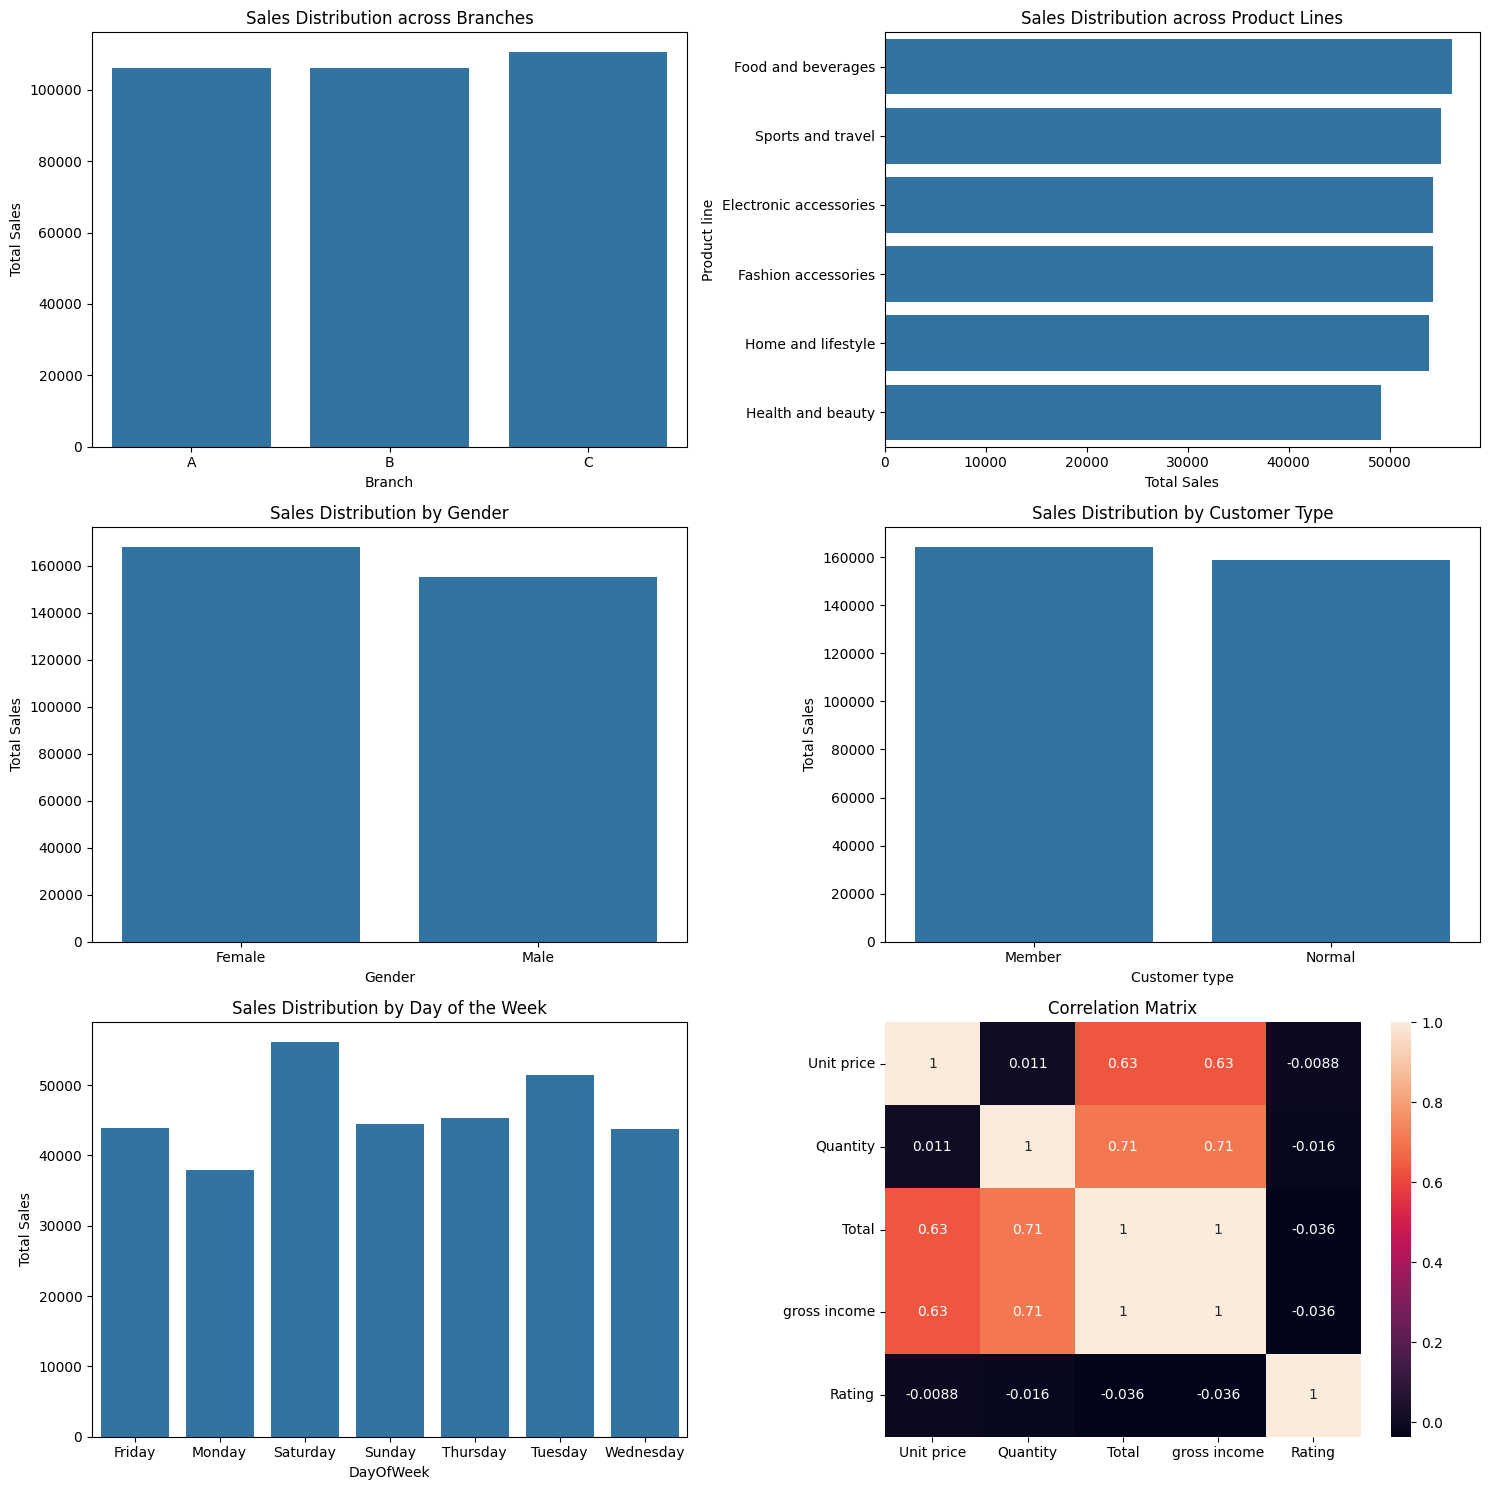

In [16]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))

sns.barplot(ax=axes[0, 0], x=branch_sales_distribution.index, y=branch_sales_distribution.values)
axes[0, 0].set_title('Sales Distribution across Branches')
axes[0, 0].set_ylabel('Total Sales')

sns.barplot(ax=axes[0, 1], x=product_line_distribution.values, y=product_line_distribution.index)
axes[0, 1].set_title('Sales Distribution across Product Lines')
axes[0, 1].set_xlabel('Total Sales')

sns.barplot(ax=axes[1, 0], x=gender_sales_distribution.index, y=gender_sales_distribution.values)
axes[1, 0].set_title('Sales Distribution by Gender')
axes[1, 0].set_ylabel('Total Sales')

sns.barplot(ax=axes[1, 1], x=customer_type_distribution.index, y=customer_type_distribution.values)
axes[1, 1].set_title('Sales Distribution by Customer Type')
axes[1, 1].set_ylabel('Total Sales')

sns.barplot(ax=axes[2, 0], x=day_sales_distribution.index, y=day_sales_distribution.values)
axes[2, 0].set_title('Sales Distribution by Day of the Week')
axes[2, 0].set_ylabel('Total Sales')

sns.heatmap(ax=axes[2, 1], data=correlation_matrix, annot=True)
axes[2, 1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()


# Key Insights from Supermarket Sales Data Analysis

## Sales Distribution across Branches
- There is variation in total sales among the branches. This difference could be attributed to factors such as location, size of the branch, or local demographic characteristics.

## Sales Distribution across Product Lines
- Some product lines are more popular, as indicated by their higher sales figures. This information is crucial for inventory management and marketing strategies.

## Sales Distribution by Gender
- The sales distribution between male and female customers shows different spending patterns. This can be valuable for targeted marketing and product placement.

## Sales Distribution by Customer Type
- There is a noticeable difference in total sales between Members and Normal customers. This suggests the influence of customer loyalty programs or other factors that differentiate these groups.

## Sales Distribution by Day of the Week
- Sales vary across different days, indicating potential trends or patterns in customer shopping behavior. This can inform staffing and promotional activities.

## Correlation Matrix
- The correlation heatmap shows relationships between numerical variables. Notably, there is a positive correlation between the total amount of sales and gross income. The correlation between other factors like unit price, quantity, and customer rating offers insights into purchasing patterns and preferences.
